In [1]:
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Advances in ML - Coursework

### Q1 

(a)
If the agent plays against itself, with both sides learning, the learning will be faster, i.e. the value function will converge faster to the true values initially, as the alogrithm challenges and counters its own strategy.

However, as the agent plays against itself, it might reach an equillibrium where no randomness is brought into the learning. When this equillibrium is not the true value function, the algorithm will be stuck there and never update. In $\epsilon$-greedy algorithms, it will slowly update depending on the $\epsilon$ we set, but slower than the case where the agent plays against a random opponent.

Hence, initially the value functions are learned faster but stagnation might follow with some proability. If stagnated, it will learn a different policy other than the true optimal ones.


(b) It might play better or worse than a non-player depending on the specific game. A greed player chooses the action according to estimated best-value action. This might result in the play lock in a suboptimal strategy forever, and can not be guaranteed to beat all other strategies. A non-greedy player plays randomly, so it might be beat by the greedy player's suboptial stragety and might not.

(c) 
$$
a_{11}a_{12}a_{13}a_{21}a_{22}a_{23}a_{31}a_{32}a_{33}\\
a_{11}a_{21}a_{31}a_{12}a_{22}a_{32}a_{13}a_{23}a_{33}\\
a_{13}a_{12}a_{11}a_{23}a_{22}a_{21}a_{33}a_{32}a_{31}\\
a_{13}a_{23}a_{33}a_{12}a_{22}a_{32}a_{11}a_{21}a_{31}\\
a_{31}a_{21}a_{11}a_{32}a_{22}a_{12}a_{33}a_{23}a_{13}\\
a_{31}a_{32}a_{33}a_{21}a_{22}a_{23}a_{11}a_{12}a_{13}\\
a_{33}a_{23}a_{13}a_{32}a_{22}a_{12}a_{31}a_{21}a_{11}\\
a_{33}a_{32}a_{31}a_{23}a_{22}a_{21}a_{13}a_{12}a_{11}\\
$$

In [18]:
b = np.array([["a_{11}", "a_{12}", "a_{13}"],
              ["a_{21}", "a_{22}", "a_{23}"],
              ["a_{31}", "a_{32}", "a_{33}"]])
def to_latex(b):
    return "".join([str(s) for s in b.flatten()])

equi = [
        np.flip(b, axis=1),
        np.flip(b, axis=0),
        np.flip(b, axis=1).T,
        np.flip(b, axis=0).T,
        np.flip(b, axis=1)[[2,1,0], :],
        np.flip(b, axis=0)[[2,1,0], :],
        np.flip(b, axis=1)[[2,1,0], :].T,
        np.flip(b, axis=0)[[2,1,0], :].T,
        np.flip(b, axis=1)[:, [2,1,0]],
        np.flip(b, axis=0)[:, [2,1,0]],
        np.flip(b, axis=1).T[:, [2,1,0]],
        np.flip(b, axis=0).T[:, [2,1,0]],
        b[[2,1,0], :],
        b[[2,1,0], :].T,
        b[:, [2,1,0]],
        b[:, [2,1,0]].T,
        b.T,
        b.T[[2,1,0], :],
        b.T[:, [2,1,0]],
        np.flip(b.T, axis=1),
        np.flip(b.T, axis=0),
        np.flip(b.T, axis=1).T,
        np.flip(b.T, axis=0).T,
        np.flip(b.T, axis=1)[[2,1,0], :],
        np.flip(b.T, axis=0)[[2,1,0], :],
        np.flip(b.T, axis=1)[[2,1,0], :].T,
        np.flip(b.T, axis=0)[[2,1,0], :].T,
        np.flip(b.T, axis=1)[:, [2,1,0]],
        np.flip(b.T, axis=0)[:, [2,1,0]],
        np.flip(b.T, axis=1).T[:, [2,1,0]],
        np.flip(b.T, axis=0).T[:, [2,1,0]],
]

equi_str = sorted(set([to_latex(b) for b in equi]))
for s in equi_str: print(s)


a_{11}a_{12}a_{13}a_{21}a_{22}a_{23}a_{31}a_{32}a_{33}
a_{11}a_{21}a_{31}a_{12}a_{22}a_{32}a_{13}a_{23}a_{33}
a_{13}a_{12}a_{11}a_{23}a_{22}a_{21}a_{33}a_{32}a_{31}
a_{13}a_{23}a_{33}a_{12}a_{22}a_{32}a_{11}a_{21}a_{31}
a_{31}a_{21}a_{11}a_{32}a_{22}a_{12}a_{33}a_{23}a_{13}
a_{31}a_{32}a_{33}a_{21}a_{22}a_{23}a_{11}a_{12}a_{13}
a_{33}a_{23}a_{13}a_{32}a_{22}a_{12}a_{31}a_{21}a_{11}
a_{33}a_{32}a_{31}a_{23}a_{22}a_{21}a_{13}a_{12}a_{11}


In [8]:
print(b)
print(np.flip(b, axis=1))
print(np.flip(b, axis=0))

[['a_{11}' 'a_{12}' 'a_{13}']
 ['a_{21}' 'a_{22}' 'a_{23}']
 ['a_{31}' 'a_{32}' 'a_{33}']]
[['a_{13}' 'a_{12}' 'a_{11}']
 ['a_{23}' 'a_{22}' 'a_{21}']
 ['a_{33}' 'a_{32}' 'a_{31}']]
[['a_{31}' 'a_{32}' 'a_{33}']
 ['a_{21}' 'a_{22}' 'a_{23}']
 ['a_{11}' 'a_{12}' 'a_{13}']]


(d) We can merge the five states equivalent through symmetries into one state (call it the 'mother state'), and update the value function of those states together. When doing this, we record the mapping of entries of a state to its mother state entries. When executing the policy, we then consider the action mapped back from the mother state.

(e) This can reduce the number of total states considered by the agent, thus making the value functions converging faster.

(f) In theory, the value function should always be symmetric. Therefore, a general optimal action policy should arise from a symmetric estimated value function so taking advantage of symmetries will always help for an arbitrary(random) or symmetric opponent strategy. However, if we want to beat a specific opponoent with a non-random policy, then the general optimal action policy might not be the best. In that case, the equivalent positions should not necessarily have the same value, and a non-symmetric strategy should counter the opponent's strategy better.

(g) Use a more general temporal difference learning: 
$$
V(S_t) \leftarrow V(S_t) + \alpha [ \gamma V(S_{t+1}) - V(S_t) ] \\
V(S_t) \leftarrow V(S_t) + \alpha [V(S_{t+1}) - V(S_t) ]
$$

(h) Instead of on-policy learning by estiamting $v(s)$, we can use off-policy Q-learning to estimate the $q(s, a)$ where policy update is embedded.

(i) This scheme might encourage the student to focus on answering addition correctly while not actively learning subtraction. With the prior knowledge that substracion is more difficult, we can set the reward higher for answering correctly a subtraction question. On the other hand, the penalty of answering a question wrong can be set at a negative value such as -0.5. 

#### Coding - board basics

In [4]:
# 2 - No entry
# 1 - Agent's entry
# 0 - Opponent's entry

board = np.array([2] * 9)

terminal_condition = [
    [0, 1, 2], [3, 4, 5], [6, 7, 8],
    [0, 3, 6], [1, 4, 7], [2, 5, 8],
    [0, 4, 8], [2, 4, 6]
]

def board_display(board):
    d = {1: 'O', 0: 'X', 2:'-'}
    board = [d[e] for e in board]
    print(board[0:3])
    print(board[3:6])
    print(board[6:9])

def to_str(board):
    return "".join([str(e) for e in board])

def to_board(key):
    return np.array([int(e) for e in list(key)])

def check_winning(board):
    for l in terminal_condition:
        if list(board[l]) == [0] * 3: return 0
        elif list(board[l]) == [1] * 3: return 1
    return -1

#### Coding - players' action

In [6]:

def add_key(V, board_key, winner):
    if winner != -1:  # There is a winner
        V[board_key] = winner  # If agent wins, value <- 1; otherwise 0
    else:  # No winner
        V[board_key] = 0.5  # Initalise value <- 0.5
    return V

def agency_act(V, board, epsilon=0.1):
    # exploration
    if np.random.random() <= epsilon:
        possible_i = []
        for i in range(9):
            if board[i] == 2: possible_i.append(i)
        board[np.random.choice(possible_i)] = 1
        new_state_key = to_str(board)
        
        winner = check_winning(board)
        if not new_state_key in V.keys(): V = add_key(V, new_state_key, winner)
        return V, board
    
    # Greedy
    possible_new_states_key = []
    for i in range(9):
        if board[i] == 2:
            # 1. Possible new state keys
            new_state = board.copy()
            new_state[i] = 1
            new_state_key = to_str(new_state)
            possible_new_states_key.append(new_state_key)
            # 2. Update V dict if necessary
            winner = check_winning(new_state)
            if not new_state_key in V.keys(): V = add_key(V, new_state_key, winner)
    
    max_value = max([V[s] for s in possible_new_states_key])
    max_keys = [s for s in possible_new_states_key if V[s] == max_value]
    return V, to_board(np.random.choice(max_keys))

def opponent_act(board, mode):
    # possible moves now
    possible_i = []
    for i in range(9):
        if board[i] == 2:
            possible_i.append(i)

    if mode == "random": 
        board[np.random.choice(possible_i)] = 0
        return board

    elif mode == "smart1":
        for i in possible_i:
            new_state = board.copy()
            new_state[i] = 0
            if check_winning(new_state) == 0:  # play this to win
                board[i] = 0
                return board
        return opponent_act(board, mode="random")

    elif mode == "smart2":
        for i in possible_i:  # able to win the game?
            new_state = board.copy()
            new_state[i] = 0
            if check_winning(new_state) == 0:  # play this to win
                board[i] = 0
                return board
        for i in possible_i:  # able to prevent losing?
            new_state = board.copy()
            new_state[i] = 1
            if check_winning(new_state) == 1:  # agent will play this to win
                board[i] = 0
                return board
        return opponent_act(board, mode="random")

def value_func_update(V, prev_key, this_key, alpha=0.4):
    V[prev_key] += alpha * (V[this_key] - V[prev_key])
    return V

Train:

In [8]:
def train(mode, N=10000, epsilon=0.1, alpha=0.4):
    V = dict()

    win_count = 0
    win_record = []
    lose_count = 0
    lose_record = []
    tie_count = 0
    tie_record = []
    
    for epoch in range(N):  # Numbers of games to play
        player = 0
        board = np.array([2] * 9)  # Initialise board

        # One round of game
        flag = 1
        while True:
            player = 1 - player  # set the player
            # 1. Check the current board; decide whether to play further
            board_key = to_str(board)
            winner = check_winning(board)
            
            if not (board_key in V.keys()): V = add_key(V, board_key, winner)
            
            if (winner != -1) or (np.sum(board == 2) == 0): flag = 0

            # 2. Game is over - Update record
            if not flag:
                if winner == 1: win_count += 1
                elif winner == 0: lose_count += 1
                else: tie_count += 1
                win_record.append(win_count / (epoch + 1))
                lose_record.append(lose_count / (epoch + 1))
                tie_record.append(tie_count / (epoch + 1))
                break

            # 3. Game continues - Player acts
            prev_key = board_key
            if player: 
                V, board = agency_act(V, board, epsilon=epsilon)
                new_key = to_str(board)
                # value update
                V = value_func_update(V, prev_key, new_key, alpha=alpha)
            else:
                board = opponent_act(board, mode=mode)
                # value update
                new_key = to_str(board)
                winner = check_winning(board)
                if not (new_key in V.keys()): V = add_key(V, new_key, winner)
                V = value_func_update(V, prev_key, new_key, alpha=alpha)

        if (epoch + 1) % 4000 == 0: print("Epoch", epoch + 1, "done!")
        
    plt.plot(win_record, label='Win Number')
    plt.plot(tie_record, label='Tie Number')
    plt.plot(lose_record, label='Lose Number')

    # Adding labels
    plt.xlabel('Match Number')  # X-axis label
    plt.ylabel('Rate')  # Y-axis label
    plt.title('Game Outcome Rates Over Matches')  # Title of the plot
    plt.legend()  # Show legend to identify each line
    
    return V

def test(mode, V, M=1000):
    win, lose = 0, 0
    for _ in range(M):
        player = 0
        board = np.array([2] * 9)  # Initialise board
        # One round of game
        while np.sum(board == 2) != 0:
            player = 1 - player  # set the player
            # 1. Check the current board
            winner = check_winning(board)
            if winner == 1: 
                win += 1
                break
            elif winner == 0: 
                lose += 1
                break
            # 2. Update the board by acting
            if player: board = agency_act(V, board, epsilon=0)[1]
            else: board = opponent_act(board, mode=mode)
    print("Win: ", win / M * 100, "%")
    print("Lose: ", lose / M * 100, "%")
    return (win, lose, M - win - lose)

Check rate of winning:

Epoch 4000 done!
Epoch 8000 done!
Epoch 12000 done!
Epoch 16000 done!
Epoch 20000 done!
Epoch 24000 done!
Epoch 28000 done!
Epoch 32000 done!
Epoch 36000 done!
Epoch 40000 done!
Win:  93.89999999999999 %
Lose:  1.2 %
Win:  93.2 %
Lose:  2.6 %
Win:  41.699999999999996 %
Lose:  25.5 %


(417, 255, 328)

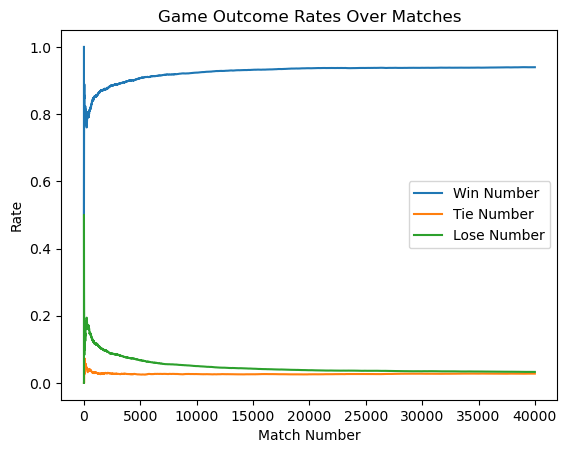

In [13]:
V_trained = train(mode="random", N=40000)
test(mode="random", V=V_trained)
test(mode="smart1", V=V_trained)
test(mode="smart2", V=V_trained)

Epoch 4000 done!
Epoch 8000 done!
Epoch 12000 done!
Epoch 16000 done!
Epoch 20000 done!
Epoch 24000 done!
Epoch 28000 done!
Epoch 32000 done!
Epoch 36000 done!
Epoch 40000 done!
Win:  97.5 %
Lose:  0.0 %
Win:  97.6 %
Lose:  0.0 %
Win:  76.4 %
Lose:  0.0 %


(764, 0, 236)

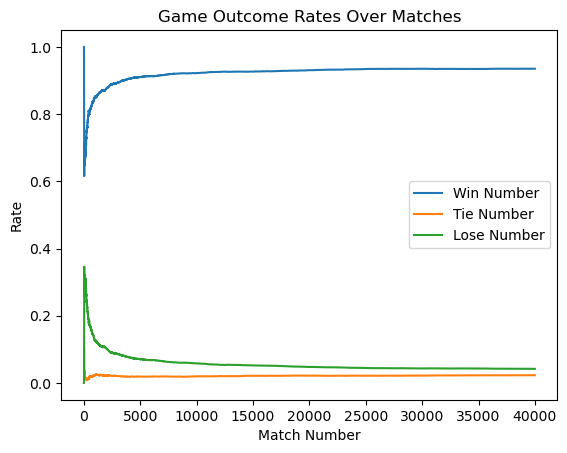

In [14]:
V_trained = train(mode="smart1", N=40000)
test(mode="random", V=V_trained)
test(mode="smart1", V=V_trained)
test(mode="smart2", V=V_trained)

Epoch 4000 done!
Epoch 8000 done!
Epoch 12000 done!
Epoch 16000 done!
Epoch 20000 done!
Epoch 24000 done!
Epoch 28000 done!
Epoch 32000 done!
Epoch 36000 done!
Epoch 40000 done!
Epoch 44000 done!
Epoch 48000 done!
Epoch 52000 done!
Epoch 56000 done!
Epoch 60000 done!
Epoch 64000 done!
Epoch 68000 done!
Epoch 72000 done!
Epoch 76000 done!
Epoch 80000 done!
Epoch 84000 done!
Epoch 88000 done!
Epoch 92000 done!
Epoch 96000 done!
Epoch 100000 done!
Epoch 104000 done!
Epoch 108000 done!
Epoch 112000 done!
Epoch 116000 done!
Epoch 120000 done!
Win:  80.2 %
Lose:  0.0 %


(802, 0, 198)

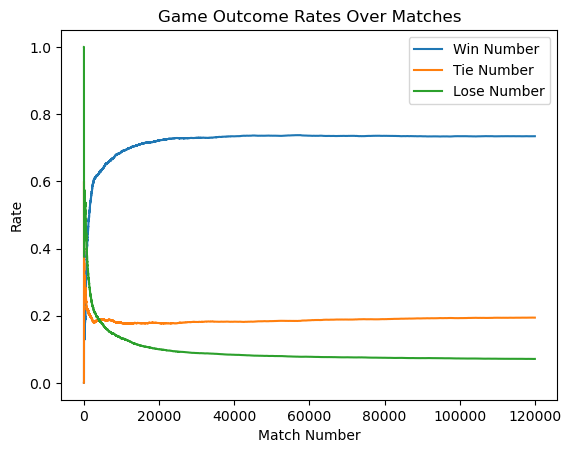

In [15]:
V_trained = train(mode="smart2", N=120000)
test(mode="random", V=V_trained)
test(mode="smart1", V=V_trained)
test(mode="smart2", V=V_trained)

Discussion: Update state values on each move or on agent's move

In a typical temporal difference learning scheme, the value function is only updated after the agent's move. This makes sense as normally we have an agent and an environment, instead of the agent-opponent dichotomy in the tic-tac-toe. 

Updating value functions after both the agent's and opponent's move can significantly improve the learning of the agent. In the win-and-block opponent scenario, the agent reaches 80% win rate after training without losing.
In comparison, only 20% win rate after training with updating values only after the agent's moves.

With this result we can conclude a typical temporal difference learning scheme does not suit a game like tic-tac-toe. While the one updating value function after each move gave very promising training results, it also raises some concerns:

1) Locally fitting. As the agent learns efficiently to counter the opponent's move, the optimal action learned is local. In this case, when played with an opponent with a different strategy, the performance can be much worse. Although this effect is not too serious in tic-tac-toe as it is a rather simple game, it could be dangerous with other more sophisticated games.

2) What-not-how principle. By updating values after the opponent's moves, with the opponent implementing a very specific strategy, one is setting a roadmap for the agent to learn. This does not agree with the what-not-how principle. Training in this way appears more like an analytical approach - in this case it's forcing our agent to implement the opponent's strategy - instead of a RL approach.
